## Class et main pour coloriser une image :

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import os 

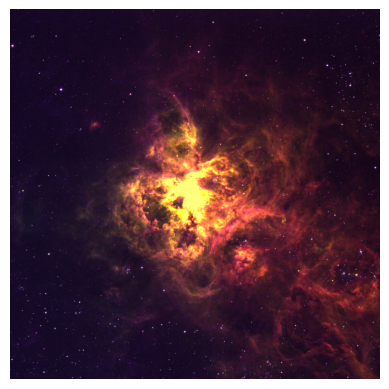

In [2]:
def normalisation(data, min=1, max=99):
        min = np.percentile(data, min)
        max = np.percentile(data, max)
        scaled_data = np.clip(data, min, max)

        return (scaled_data - min) / (max - min + 1e-8)

rouge = fits.getdata( os.path.join('test1/Tarantula_Nebula-halpha.fit'))
vert = fits.getdata( os.path.join('test1/Tarantula_Nebula-oiii.fit'))
bleu = fits.getdata( os.path.join('test1/Tarantula_Nebula-sii.fit'))

rouge = np.nan_to_num(rouge)
vert = np.nan_to_num(vert)
bleu = np.nan_to_num(bleu)

rouge = normalisation(rouge)
vert = normalisation(vert)
bleu = normalisation(bleu)

rouge *= 2      # On ajoutera des roue sur l'app pour modifié mais ça risque de pas être très fluide
vert *= 1
bleu *= 0.5

rouge = np.clip(rouge, 0, 1)
vert = np.clip(vert, 0, 1)
bleu = np.clip(bleu, 0, 1)


image_final = np.stack((rouge ,vert , bleu) , axis=-1)

plt.imshow(image_final)
plt.axis('off')
plt.savefig('image')
plt.show()

Aide pour moi :

np.percentile(data, 1) renvoie la valeur en dessous de laquelle se trouvent 1 % des pixels, tandis que np.percentile(data, 99) renvoie la valeur en dessous de laquelle se trouvent 99 % des pixels. Cela permet de rejeter les valeurs extrêmes (comme les valeurs très faibles ou très fortes), ce qui est souvent utile pour éviter qu'une image soit "polluée" par des pixels aberrants.